# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania z wielu miejsc początkowych 1 pkt


In [1]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

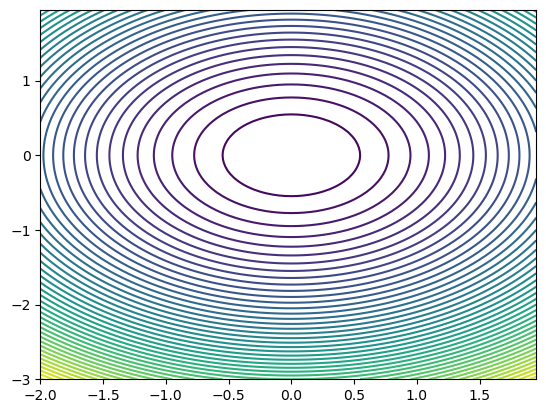

In [2]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

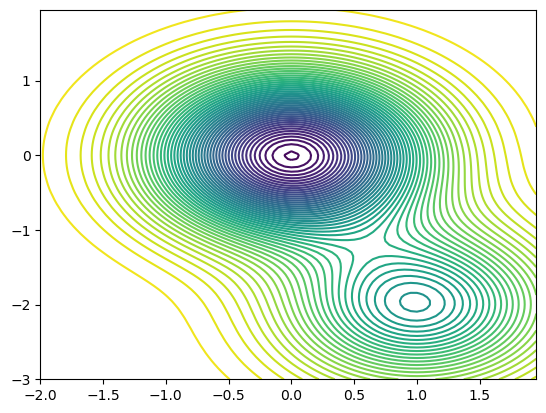

In [3]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [4]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace)>0:
            plt.scatter(self.trace[:,0], self.trace[:,1], s=10)

    def calculate_func_value(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        grad = self.calculate_func_grad(x1, x2)
        return (x1 + self.alpha[0] * grad[0], x2 + self.alpha[1] * grad[1])

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:
        x1_cur =  x1_init
        x2_cur = x2_init
        trace =  np.array([[x1_init,x2_init]])

        for i in range(steps):
            x1_after_step, x2_after_step  = self.gradient_descent_step(x1_cur, x2_cur)
            x1_cur, x2_cur  = x1_after_step, x2_after_step
            trace = np.append(trace, [[x1_after_step, x2_after_step]], axis=0)
            if verbose == 2 and i % 4 == 0:
                print(f'STEP {i} : point({x1_cur},{x2_cur})')
        self.trace = trace

        minimum_value = self.calculate_func_value(x1_cur, x2_cur)
        if verbose > 1:
            print(f'START POINT = ({x1_init},{x2_init})') 
            print(f'MINIMUM VALUE = {minimum_value}')
        
        return minimum_value

            

# Funkcja 1

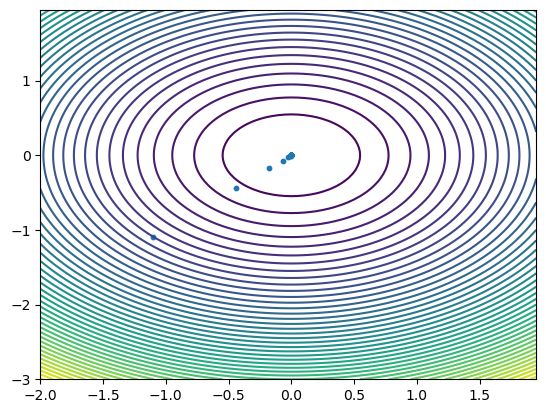

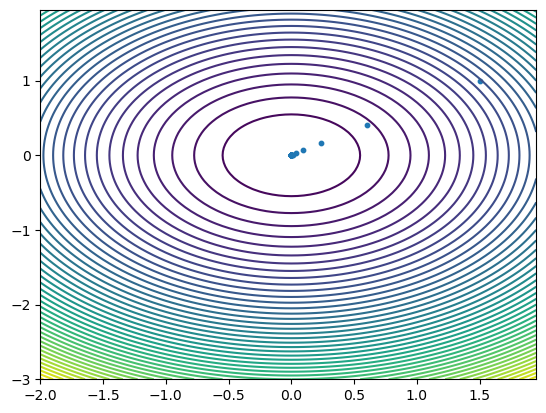

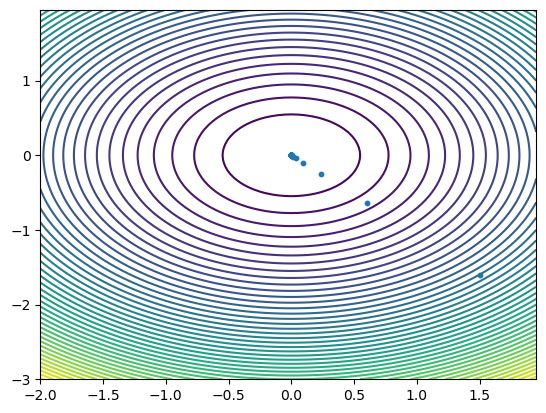

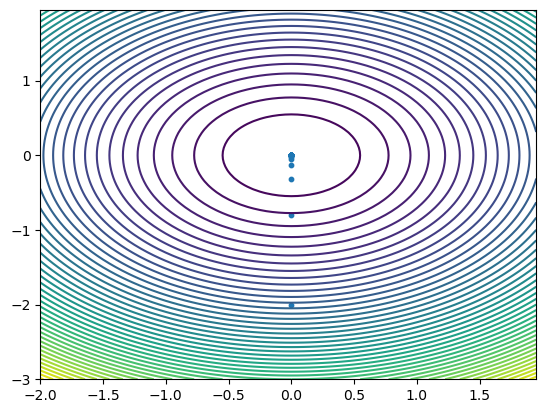

In [5]:
from random import randrange
from math import sqrt

def function_1(x1:float, x2:float)-> Tuple[float, float]:
    return (x1**2 + x2**2)

def gradient_function_1(x1:float, x2:float) ->Tuple[float, float]:
    return (2*x1, 2*x2)
        


simple_gradient_descent = SimpleGradientDescent(func=function_1,
                                                 grad_func=gradient_function_1, alpha=[-0.3, -0.3])

start_points = [(-1.1, -1.1), (1.5, 1.0), (1.5, -1.6), (0,-2)]
# start_points = [(randrange(-2,2),randrange(-3,2)) for _ in range(5)]
for x, y in start_points: 
    minimum  = simple_gradient_descent.minimize(x, y, steps=30, verbose=1)
    simple_gradient_descent.plot_func()

# Funkcja 2

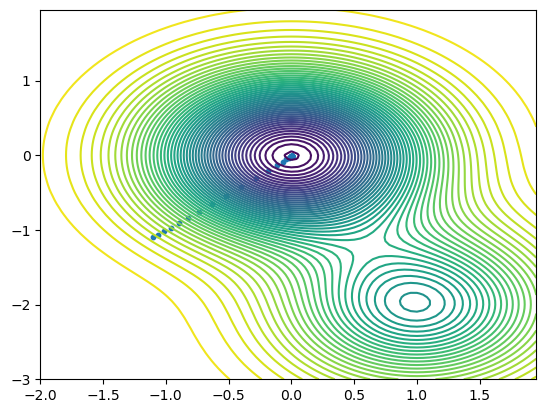

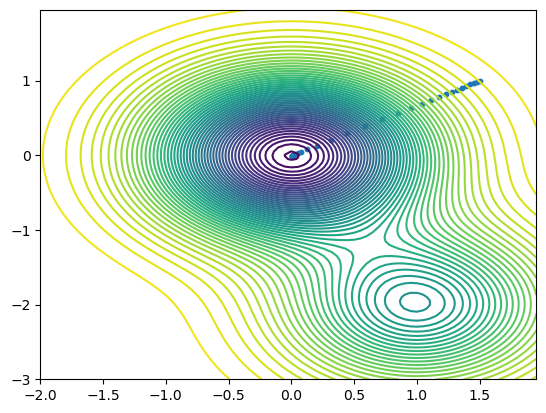

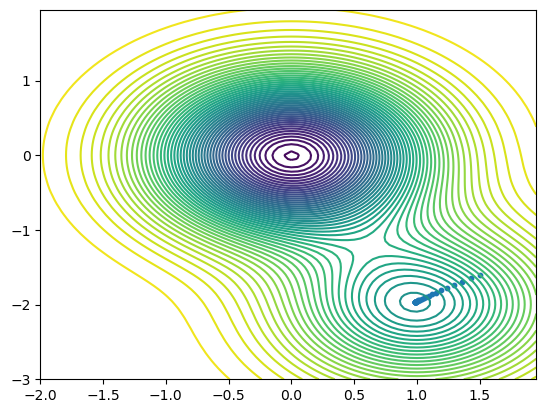

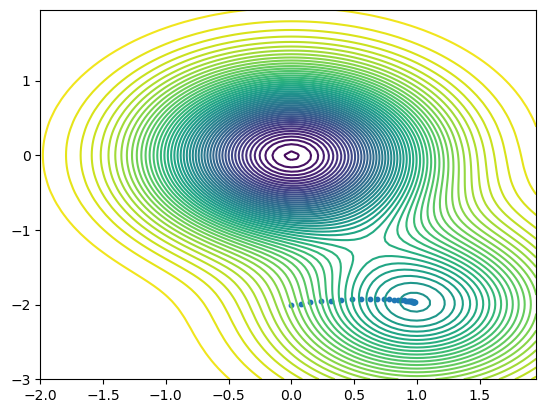

In [6]:
def function_1(x1:float, x2:float)-> Tuple[float, float]:
    return 1.5-np.exp(-x1**(2)-x2**(2))-0.5*np.exp(-(x1-1)**(2)-(x2+2)**(2))

def gradient_function_2(x1:float, x2:float) ->Tuple[float, float]:
    grad_x1 = 2 * x1 * np.exp(-x1**2 - x2**2) + (x1 - 1) * np.exp ( -(x1 - 1)**2 - (x2 + 2)**2 )
    grad_x2 = 2 * x2 * np.exp(-x1**2 - x2**2) + (x2 + 2) * np.exp ( -(x1 - 1)**2 - (x2 + 2)**2 )
    return (grad_x1, grad_x2) 


simple_gradient_descent = SimpleGradientDescent(func=function_1,
                                                 grad_func=gradient_function_2, alpha=[-0.2, -0.2])

# start_points = [(randrange(-2,2),randrange(-3,2)) for _ in range(5)]
start_points = [(-1.1, -1.1), (1.5, 1.0), (1.5, -1.6), (0,-2)]
for x, y in start_points: 
    minimum  = simple_gradient_descent.minimize(x, y, steps=30, verbose=1)
    simple_gradient_descent.plot_func()